## Import Necessary Libraries

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

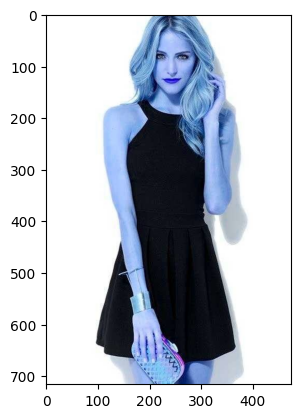

In [11]:
# Read the image
image = cv2.imread('../data/black-dress/data/test/0EHND7DO2NUC.jpg')
plt.imshow(image)

Convert Image to RGB: </br>
OpenCV loads images in BGR format, so we need to convert it to RGB

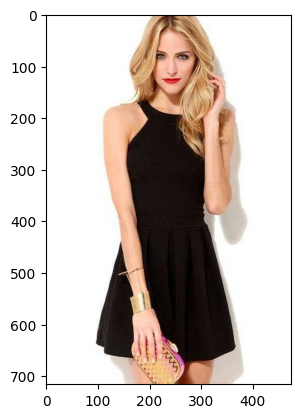

In [10]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Reshape the Image: </br>
Reshape the image to a 2D array of pixels.

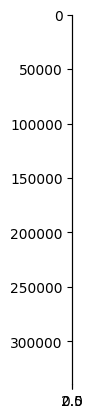

In [15]:
pixels = image.reshape((-1, 3))
plt.imshow(pixels)

Apply K-means Clustering: </br>
Use K-means clustering to find the dominant colors.

In [17]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pixels)

# Get the cluster centers (dominant colors)
dominant_colors = kmeans.cluster_centers_

Convert Colors to Integer: </br>
Convert the colors to integers (since they are in float format).

In [18]:
dominant_colors = dominant_colors.astype(int)

Display the Dominant Colors: </br>
Display the dominant colors using matplotlib.

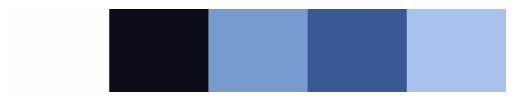

In [19]:
def plot_colors(colors):
    # Create an image of the colors
    color_image = np.zeros((50, 300, 3), dtype='uint8')

    start = 0
    for color in colors:
        end = start + 300 // num_clusters
        color_image[:, start:end] = color
        start = end

    plt.imshow(color_image)
    plt.axis('off')
    plt.show()

plot_colors(dominant_colors)

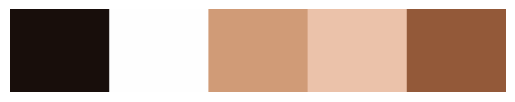

In [26]:
def detect_colors(image_path, num_clusters=5):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape((-1, 3))
    
    # Apply K-means clustering to find dominant colors
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pixels)
    
    # Get the cluster centers (dominant colors)
    dominant_colors = kmeans.cluster_centers_
    dominant_colors = dominant_colors.astype(int)
    
    return dominant_colors

def plot_colors(colors):
    # Create an image of the colors
    color_image = np.zeros((50, 300, 3), dtype='uint8')

    start = 0
    for color in colors:
        end = start + 300 // len(colors)
        color_image[:, start:end] = color
        start = end

    plt.imshow(color_image)
    plt.axis('off')
    plt.show()

# Usage
image_path = '../data/black-dress/data/test/0EHND7DO2NUC.jpg'
num_clusters = 5
dominant_colors = detect_colors(image_path, num_clusters)
plot_colors(dominant_colors)

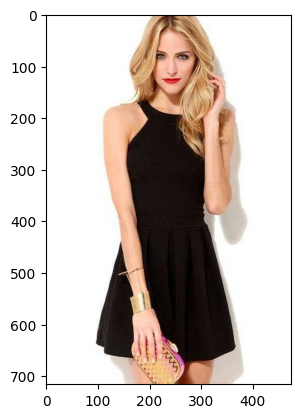

In [23]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)